# Last Mile Delivery Analysis 

In [1]:
import pandas as pd

# (BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? (Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.) 

## Implement the above question on Jupyter Notebook. Upload your implementation on your google drive and share the link below.

In [444]:
orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [457]:
orders['year'] = orders['order_placed_at'].dt.year
orders['month'] = orders['order_placed_at'].dt.month
orders['date'] = orders['order_placed_at'].dt.date
orders['hour'] = orders['order_placed_at'].dt.hour

In [458]:
orders

,order_id,order_placed_at,year,month,date,hour
0,321230114,2020-12-11 00:01:29,2020,12,2020-12-11,0
1,321230115,2020-12-11 00:36:02,2020,12,2020-12-11,0
2,321230116,2020-12-11 00:55:01,2020,12,2020-12-11,0
3,321230117,2020-12-11 01:05:27,2020,12,2020-12-11,1
4,321230118,2020-12-11 01:14:20,2020,12,2020-12-11,1
...,...,...,...,...,...,...
454331,321684445,2024-01-31 23:27:51,2024,1,2024-01-31,23
454332,321684446,2024-01-31 23:40:14,2024,1,2024-01-31,23
454333,321684447,2024-01-31 23:36:08,2024,1,2024-01-31,23
454334,321684448,2024-01-31 23:58:05,2024,1,2024-01-31,23


In [459]:
bonus = orders.groupby(['date','hour'])['order_id'].count().reset_index()

In [460]:
bonus

,date,hour,order_id
0,2020-12-11,0,3
1,2020-12-11,1,4
2,2020-12-11,2,4
3,2020-12-11,3,9
4,2020-12-11,4,6
...,...,...,...
27449,2024-01-31,19,12
27450,2024-01-31,20,16
27451,2024-01-31,21,11
27452,2024-01-31,22,4


In [466]:
bonus.rename({'order_id':'count'},axis=1,inplace=True)

In [468]:
import numpy as np

In [470]:
import matplotlib.pyplot as plt
import seaborn as sns

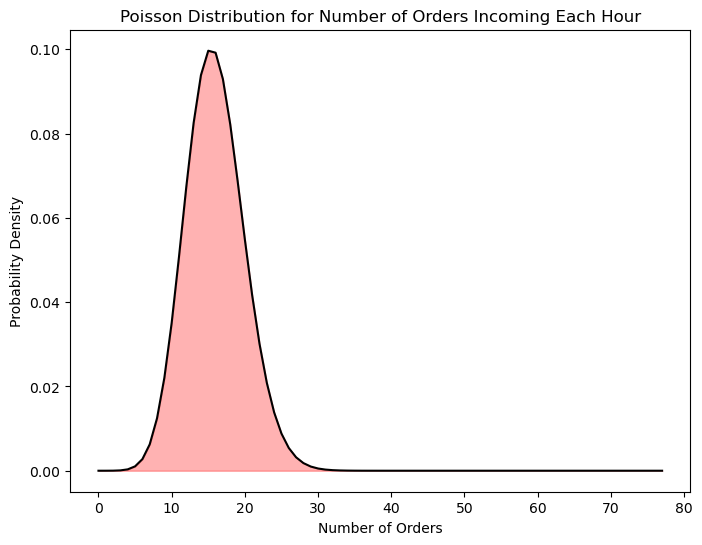

In [472]:
from scipy.stats import poisson
orders_per_hour = list(bonus['count'])[0:1000]
avg_orders_per_hour = np.mean(orders_per_hour)
x = np.arange(0, max(orders_per_hour) + 1)
pdf = poisson.pmf(x, mu=avg_orders_per_hour)
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, color='black', label='Poisson KDE')
plt.fill_between(x, pdf, color='red', alpha=0.3)
plt.title('Poisson Distribution for Number of Orders Incoming Each Hour')
plt.xlabel('Number of Orders')
plt.ylabel('Probability Density')
plt.gca().set_facecolor('white')
plt.show()

+ The Poisson distribution is commonly used to model the number of events that occur in a fixed interval of time or space, making it suitable for modeling the number of orders incoming each hour for a Pizza Store.

+ By this we can predict the number of orders that the store is likely to receive in the upcoming hours or days.

+ We can forecast the quantity of ingredients needed for the next hours or days.